In [2]:
import pandas as pd

# Load your dataset (adjust the file path if needed)
df = pd.read_csv("data.csv")

# Drop empty or irrelevant columns
df_cleaned = df.drop(columns=["qualifier", "magnitude"])

# Rename columns for better clarity
df_cleaned = df_cleaned.rename(columns={
    "indicatorId": "indicator",
    "geoUnit": "country_code",
    "year": "year",
    "value": "literacy_rate"
})

# Check for missing values
print("Missing values:\n", df_cleaned.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df_cleaned.duplicated().sum())

# Display the cleaned dataset
df_cleaned.head()


Missing values:
 indicator        0
country_code     0
year             0
literacy_rate    0
dtype: int64
Duplicate rows: 0


,indicator,country_code,year,literacy_rate
0,LR.AG15T24,AGO,2014,77.000000
1,LR.AG15T24,AGO,2015,75.660812
2,LR.AG15T24,CMR,2018,81.893387
3,LR.AG15T24,GAB,2021,93.981430
4,LR.AG15T24,GHA,2014,87.600000


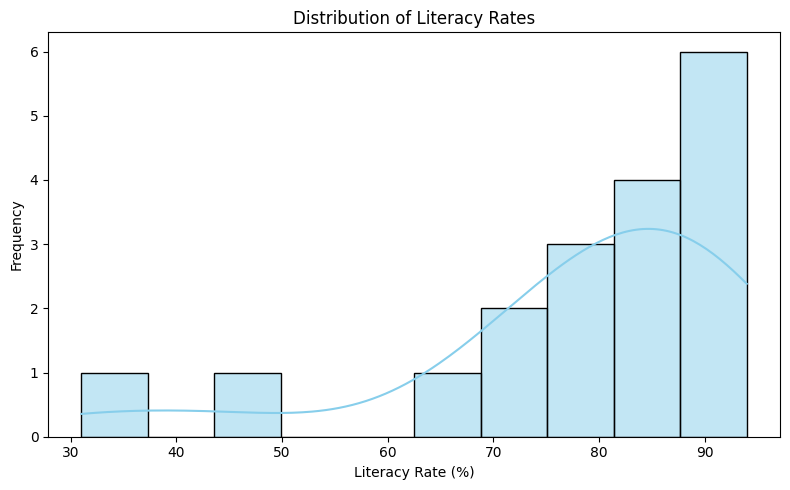

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename columns for consistency
df.rename(columns={
    "geoUnit": "country_code",
    "value": "literacy_rate",
    "indicatorId": "indicator"
}, inplace=True)

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df["literacy_rate"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Literacy Rates")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



In [ ]:
# Check the exact column names
print(df.columns)

# Fix potential whitespace or casing issues in column names
df.columns = df.columns.str.strip()

# Group by country and get summary stats
summary_stats = df.groupby("Country code")['Literacy rate'].agg(
    ["count", "mean", "min", "max"]
).reset_index().rename(columns={
    "count": "data_points",
    "mean": "avg_literacy_rate",
    "min": "min_literacy_rate",
    "max": "max_literacy_rate"
})

# Round the values
summary_stats = summary_stats.round(2)
summary_stats



In [10]:
print(df.columns.tolist())


['indicator', 'country_code', 'year', 'literacy_rate', 'qualifier', 'magnitude']


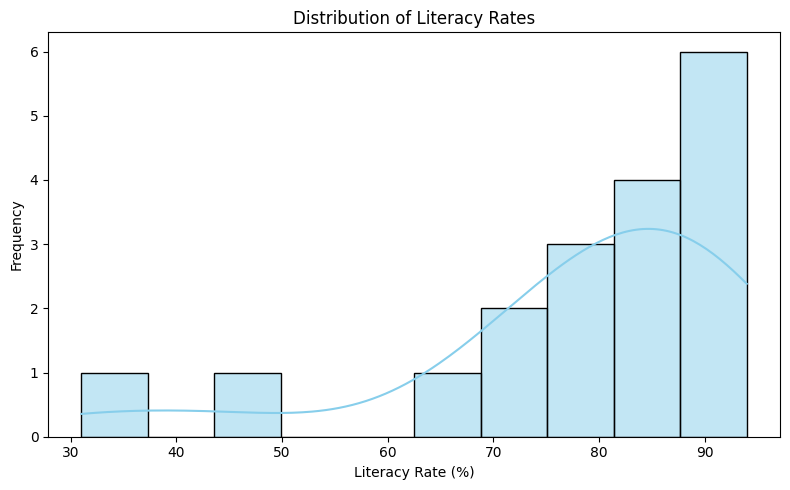

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df["literacy_rate"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Literacy Rates")
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [12]:
# Check the exact column names
print(df.columns)

# Fix potential whitespace or casing issues in column names
df.columns = df.columns.str.strip()

# Group by country and get summary stats
summary_stats = df.groupby("country_code")["literacy_rate"].agg(
    ["count", "mean", "min", "max"]
).reset_index().rename(columns={
    "count": "data_points",
    "mean": "avg_literacy_rate",
    "min": "min_literacy_rate",
    "max": "max_literacy_rate"
})

# Round the values
summary_stats = summary_stats.round(2)
summary_stats


Index(['indicator', 'country_code', 'year', 'literacy_rate', 'qualifier',
       'magnitude'],
      dtype='object')


,country_code,data_points,avg_literacy_rate,min_literacy_rate,max_literacy_rate
0,AGO,2,76.33,75.66,77.00
1,CMR,1,81.89,81.89,81.89
2,GAB,1,93.98,93.98,93.98
3,GHA,3,88.97,87.60,91.51
4,NGA,4,72.89,65.78,79.16
5,RWA,5,88.21,85.00,91.51
6,TCD,2,38.07,31.00,45.13


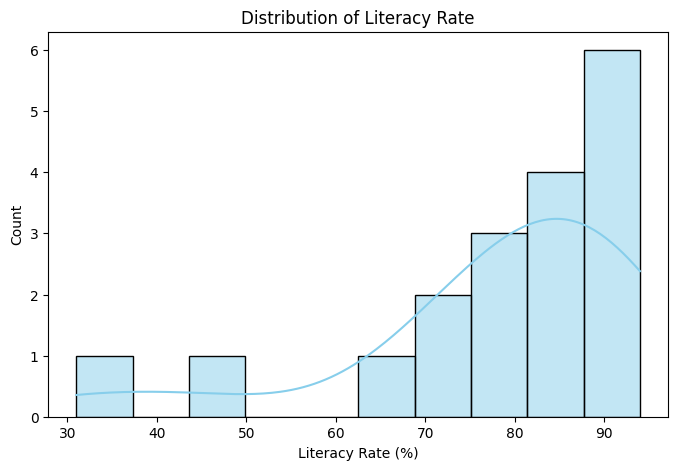

C:\Users\Escht\AppData\Local\Temp\ipykernel_12424\1640050161.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country_code', y='literacy_rate', palette='Set2')


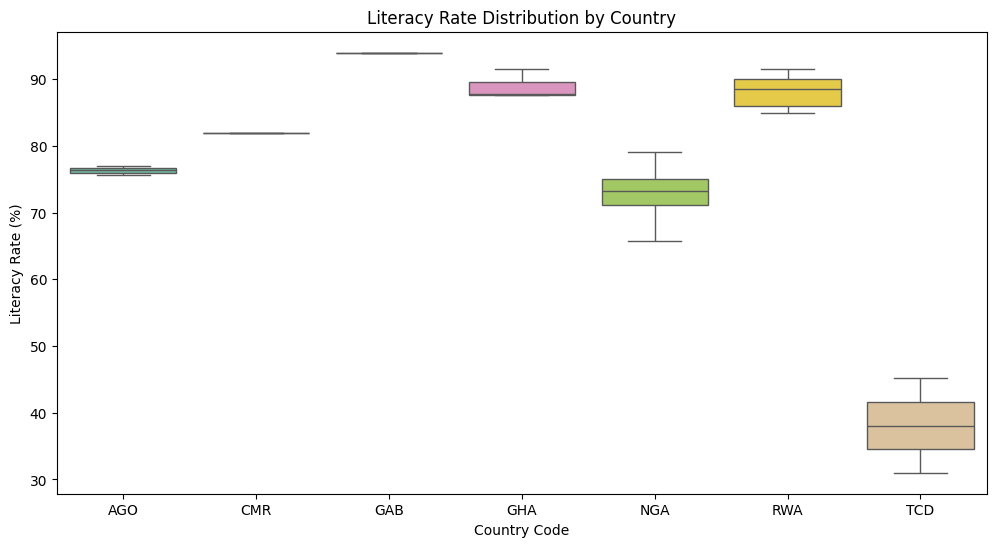

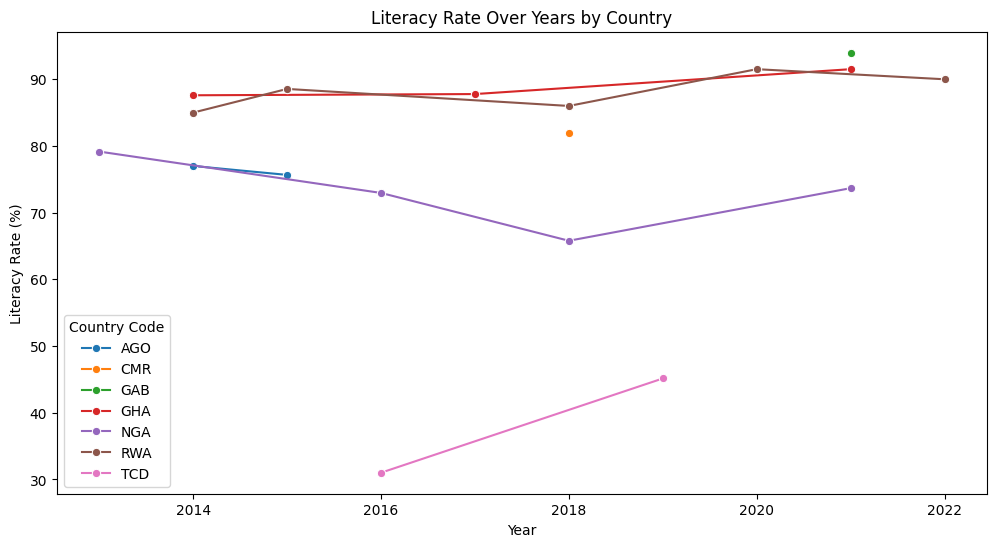

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of literacy_rate
plt.figure(figsize=(8,5))
sns.histplot(df['literacy_rate'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Literacy Rate')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Count')
plt.show()

# Boxplot to check spread and outliers by country
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='country_code', y='literacy_rate', palette='Set2')
plt.title('Literacy Rate Distribution by Country')
plt.xlabel('Country Code')
plt.ylabel('Literacy Rate (%)')
plt.show()

# Relationship: literacy_rate vs year, colored by country
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='literacy_rate', hue='country_code', marker='o')
plt.title('Literacy Rate Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.legend(title='Country Code')
plt.show()


In [17]:
pip install scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

df = pd.read_csv("data.csv")  # adjust path if needed

# Drop empty columns
df.drop(columns=["qualifier", "magnitude"], inplace=True)

# Rename columns if needed
df.rename(columns={
    "indicatorId": "indicator",
    "geoUnit": "country_code",
    "value": "literacy_rate"
}, inplace=True)


Linear model: literacy_rate = 0.8519 * year + -1640.57


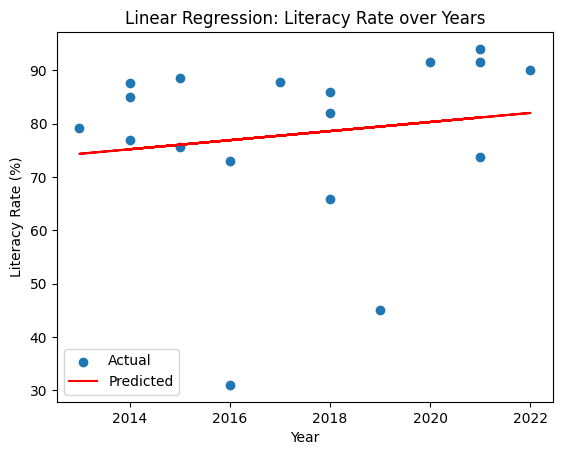

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data: year as X, literacy_rate as Y
X = df['year'].values
Y = df['literacy_rate'].values

# Fit a linear regression line (degree=1)
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

print(f"Linear model: literacy_rate = {slope:.4f} * year + {intercept:.2f}")

# Predict literacy rate using the model
Y_pred = slope * X + intercept

# Plot actual vs predicted
plt.scatter(X, Y, label='Actual')
plt.plot(X, Y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.title('Linear Regression: Literacy Rate over Years')
plt.legend()
plt.show()


In [9]:
import numpy as np

# Your actual and predicted values
# Y = actual literacy rates
# Y_pred = predicted literacy rates from the model

# RMSE
rmse = np.sqrt(np.mean((Y - Y_pred)**2))

# MAE
mae = np.mean(np.abs(Y - Y_pred))

# R squared (R²)
ss_res = np.sum((Y - Y_pred)**2)
ss_tot = np.sum((Y - np.mean(Y))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 15.953
MAE: 11.635
R²: 0.022


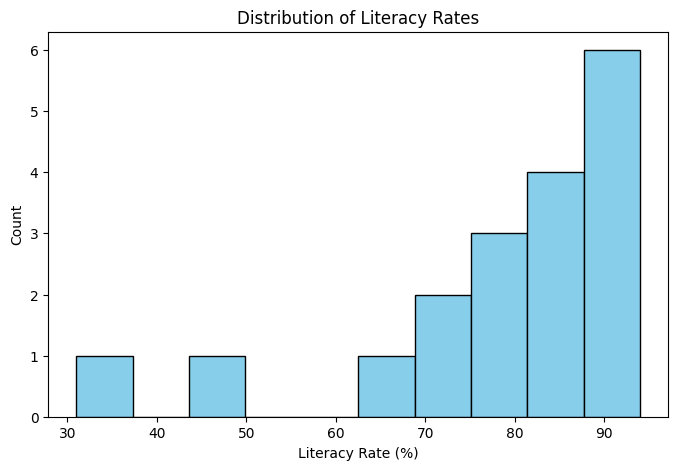

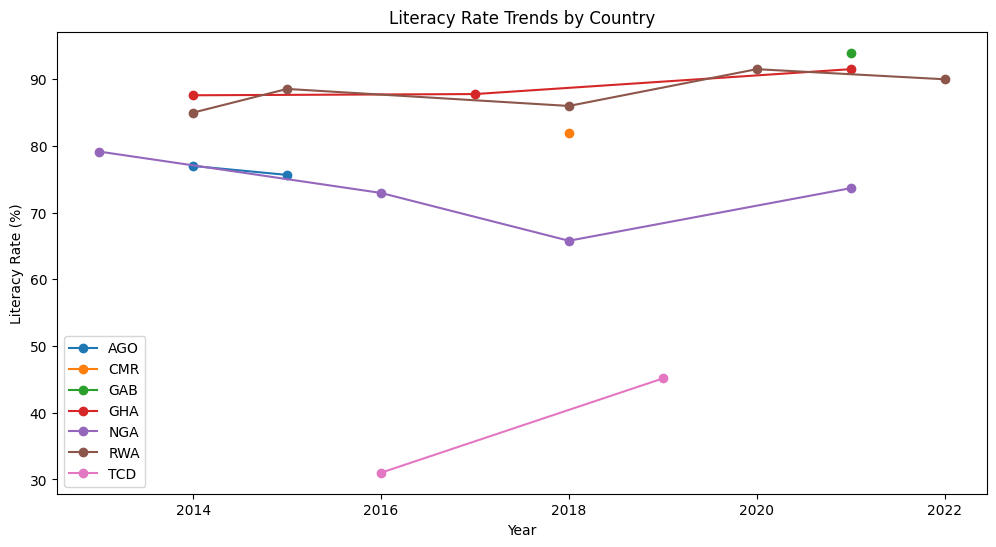

Model: literacy_rate = 0.85 * year + -1640.57


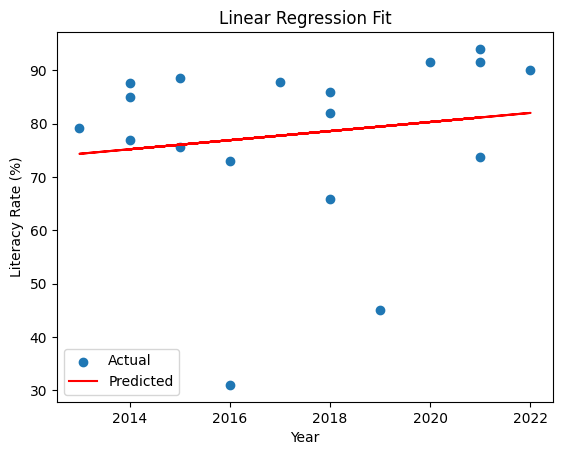

RMSE: 15.95
MAE: 11.63
R²: 0.02


In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------- DATA LOADING & CLEANING --------------------

def load_and_clean_data(filepath):
    """
    Loads the literacy dataset, cleans column names, and drops empty columns.
    """
    df = pd.read_csv(filepath)
    df.drop(columns=["qualifier", "magnitude"], inplace=True)
    df.rename(columns={
        "indicatorId": "indicator",
        "geoUnit": "country_code",
        "value": "literacy_rate"
    }, inplace=True)
    return df

# -------------------- EXPLORATORY DATA ANALYSIS --------------------

def plot_distribution(df):
    """
    Plots histogram of literacy rate.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(df['literacy_rate'], bins=10, color='skyblue', edgecolor='black')
    plt.title("Distribution of Literacy Rates")
    plt.xlabel("Literacy Rate (%)")
    plt.ylabel("Count")
    plt.show()

def plot_trend(df):
    """
    Plots literacy rate trends by country over time.
    """
    plt.figure(figsize=(12, 6))
    for country in df['country_code'].unique():
        subset = df[df['country_code'] == country]
        plt.plot(subset['year'], subset['literacy_rate'], marker='o', label=country)
    plt.title("Literacy Rate Trends by Country")
    plt.xlabel("Year")
    plt.ylabel("Literacy Rate (%)")
    plt.legend()
    plt.show()

# -------------------- SIMPLE LINEAR REGRESSION --------------------

def train_linear_regression(df):
    """
    Trains a simple linear regression model using numpy (literacy_rate vs year).
    """
    X = df['year'].values
    Y = df['literacy_rate'].values
    slope, intercept = np.polyfit(X, Y, 1)
    Y_pred = slope * X + intercept

    print(f"Model: literacy_rate = {slope:.2f} * year + {intercept:.2f}")
    return X, Y, Y_pred

def plot_regression(X, Y, Y_pred):
    """
    Plots actual vs predicted literacy rates.
    """
    plt.scatter(X, Y, label='Actual')
    plt.plot(X, Y_pred, color='red', label='Predicted')
    plt.xlabel('Year')
    plt.ylabel('Literacy Rate (%)')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()

# -------------------- EVALUATION --------------------

def evaluate_model(Y, Y_pred):
    """
    Calculates RMSE, MAE, and R² using numpy (no sklearn needed).
    """
    rmse = np.sqrt(np.mean((Y - Y_pred)**2))
    mae = np.mean(np.abs(Y - Y_pred))
    ss_res = np.sum((Y - Y_pred)**2)
    ss_tot = np.sum((Y - np.mean(Y))**2)
    r2 = 1 - (ss_res / ss_tot)

    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")

# -------------------- RUNNING THE PIPELINE --------------------

# Load and prepare data
df = load_and_clean_data("data.csv")

# EDA
plot_distribution(df)
plot_trend(df)

# Model
X, Y, Y_pred = train_linear_regression(df)
plot_regression(X, Y, Y_pred)

# Evaluation
evaluate_model(Y, Y_pred)


In [11]:
def compute_trend_strength(df):
    """
    Calculates the slope of literacy rate over time per country.
    Positive slope = improvement, Negative = decline.
    """
    trend_scores = {}

    for country in df['country_code'].unique():
        country_data = df[df['country_code'] == country]
        if len(country_data) >= 2:  # Need at least 2 points
            X = country_data['year'].values
            Y = country_data['literacy_rate'].values
            slope, _ = np.polyfit(X, Y, 1)
            trend_scores[country] = slope
        else:
            trend_scores[country] = np.nan

    # Convert to DataFrame for easy viewing
    trend_df = pd.DataFrame.from_dict(trend_scores, orient='index', columns=['trend_strength'])
    trend_df = trend_df.sort_values(by='trend_strength', ascending=False)

    print("\n📈 Literacy Trend Strength by Country:")
    print(trend_df)
    return trend_df


In [12]:
trend_df = compute_trend_strength(df)



📈 Literacy Trend Strength by Country:
     trend_strength
TCD        4.711534
GHA        0.579215
RWA        0.571042
NGA       -0.856447
AGO       -1.339188
CMR             NaN
GAB             NaN
